In [9]:
import jax.numpy as jnp
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
import random_and_near_identity_circuit as random_and_near_identity_circuit
from MPScumulant import MPS_c
import mps_circuit_helpers as helpers
import matplotlib.pyplot as plt


In [2]:
weights_and_losses_for_chis = {}

## Initial Weights: Either Randomly Assigned With No Restrictions or Weights Near Unitary

In [3]:
weights_random = jnp.array(pnp.random.normal(size=(88, 15), requires_grad=True))

weights_near_unitary = jnp.array(pnp.random.uniform(low = -0.01, high=0.01, size=(88, 15), requires_grad=True))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
random_initialized_circuit = random_and_near_identity_circuit.get_random_initialized_circuit(weights_random)
near_unitary_initialized_circuit = random_and_near_identity_circuit.get_random_initialized_circuit(weights_near_unitary)

weights_random_updated, loss_track_random = random_and_near_identity_circuit.train_model(weights_random)
weights_near_unitary_updated, loss_track_near_unitary = random_and_near_identity_circuit.train_model(weights_near_unitary)

weights_and_losses_for_chis['Random Initialization'] = [weights_random_updated, loss_track_random]
weights_and_losses_for_chis['Near Identity Initialization'] = [weights_near_unitary_updated, loss_track_near_unitary]


100%|██████████| 15000/15000 [20:26<00:00, 12.23it/s]


## Circuit Generate by MPS

[]
[]
[]


## Extending Circuit Generate by MPS

In [5]:
chis = ['BStest/BS_project-2-MPS', 'BStest/BS_project-4-MPS', 'BStest/BS_project-8-MPS']
labels = ["Chi = 2 MPS", "Chi = 4 MPS", "Chi = 8 MPS"]
maxi_bonds = [2, 4, 8]
for i in range(len(chis)):
    random_and_near_identity_circuit.maxi_bond = maxi_bonds[i]
    random_and_near_identity_circuit.chi = chis[i]
    random_and_near_identity_circuit.mps = MPS_c(12, max_bond_dim=maxi_bonds[i])

    data_states = random_and_near_identity_circuit.get_data_states("BStest/b_s_4_3.npy", 12)

    unitary_list = random_and_near_identity_circuit.get_unitaries()
    num_weights = random_and_near_identity_circuit.count_number_of_weights(unitary_list)
    weights = jnp.array(pnp.random.normal(size=(num_weights, 15), requires_grad=True))

    weights_extended, loss_track_extended = random_and_near_identity_circuit.train_model(weights, circuit_type="mps_extended")
    weights_and_losses_for_chis[labels[i]] = [weights_extended, loss_track_extended]

idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 2), 2
i = 2, (2, 2, 2), 2
i = 3, (2, 2, 2), 2
i = 4, (2, 2, 2), 2
i = 5, (2, 2, 2), 2
i = 6, (2, 2, 2), 2
i = 7, (2, 2, 2), 2
i = 8, (2, 2, 2), 2
i = 9, (2, 2, 2), 2
i = 10, (2, 2, 2), 2
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10


  0%|          | 0/15000 [00:00<?, ?it/s]

idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 2), 2
i = 2, (2, 2, 2), 2
i = 3, (2, 2, 2), 2
i = 4, (2, 2, 2), 2
i = 5, (2, 2, 2), 2
i = 6, (2, 2, 2), 2
i = 7, (2, 2, 2), 2
i = 8, (2, 2, 2), 2
i = 9, (2, 2, 2), 2
i = 10, (2, 2, 2), 2
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 2), 2
i = 2, (2, 2, 2), 2
i = 3, (2, 2, 2), 2
i = 4, (2, 2, 2), 2
i = 5, (2, 2, 2), 2
i = 6, (2, 2, 2), 2
i = 7, (2, 2, 2), 2
i = 8, (2, 2, 2), 2
i = 9, (2, 2, 2), 2
i = 10, (2, 2, 2), 2
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10


100%|██████████| 15000/15000 [13:27<00:00, 18.58it/s]


idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 4), 4
i = 3, (4, 2, 4), 4
i = 4, (4, 2, 4), 4
i = 5, (4, 2, 4), 4
i = 6, (4, 2, 4), 4
i = 7, (4, 2, 4), 4
i = 8, (4, 2, 4), 4
i = 9, (4, 2, 4), 4
i = 10, (4, 2, 2), 4
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10


  0%|          | 0/15000 [00:00<?, ?it/s]

idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 4), 4
i = 3, (4, 2, 4), 4
i = 4, (4, 2, 4), 4
i = 5, (4, 2, 4), 4
i = 6, (4, 2, 4), 4
i = 7, (4, 2, 4), 4
i = 8, (4, 2, 4), 4
i = 9, (4, 2, 4), 4
i = 10, (4, 2, 2), 4
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 4), 4
i = 3, (4, 2, 4), 4
i = 4, (4, 2, 4), 4
i = 5, (4, 2, 4), 4
i = 6, (4, 2, 4), 4
i = 7, (4, 2, 4), 4
i = 8, (4, 2, 4), 4
i = 9, (4, 2, 4), 4
i = 10, (4, 2, 2), 4
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10


100%|██████████| 15000/15000 [11:28<00:00, 21.80it/s]


idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 8), 4
i = 3, (8, 2, 8), 8
i = 4, (8, 2, 8), 8
i = 5, (8, 2, 8), 8
i = 6, (8, 2, 8), 8
i = 7, (8, 2, 8), 8
i = 8, (8, 2, 8), 8
i = 9, (8, 2, 4), 8
i = 10, (4, 2, 2), 4
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10


  0%|          | 0/15000 [00:00<?, ?it/s]

idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 8), 4
i = 3, (8, 2, 8), 8
i = 4, (8, 2, 8), 8
i = 5, (8, 2, 8), 8
i = 6, (8, 2, 8), 8
i = 7, (8, 2, 8), 8
i = 8, (8, 2, 8), 8
i = 9, (8, 2, 4), 8
i = 10, (4, 2, 2), 4
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 8), 4
i = 3, (8, 2, 8), 8
i = 4, (8, 2, 8), 8
i = 5, (8, 2, 8), 8
i = 6, (8, 2, 8), 8
i = 7, (8, 2, 8), 8
i = 8, (8, 2, 8), 8
i = 9, (8, 2, 4), 8
i = 10, (4, 2, 2), 4
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10


100%|██████████| 15000/15000 [09:29<00:00, 26.34it/s]


random_init
[4.390064497412359, 3.880018130318472, 3.620035273247882, 3.4425840551584064, 3.2822643374194374, 3.1215834251703263, 2.9644342071908114, 2.8156757680262574, 2.679062569002285, 2.5557255995747745, 2.4440185677247634, 2.342040363694847, 2.249439570835176, 2.166743684735811, 2.0935153245708946, 2.027527909666483, 1.9658421914563609, 1.9065817345867824, 1.8496521685161975, 1.7958982584519179, 1.7457613148930717, 1.6988355674784006, 1.654567652871523, 1.6130904885945452, 1.5752203348846432, 1.541704500626983, 1.5124978511938731, 1.4866397989604527, 1.462741330020472, 1.4396513764611438, 1.4168005193125044, 1.3940956442523436, 1.3716575851795183, 1.3496938456386292, 1.3284927011472454, 1.308349167733076, 1.289382527124577, 1.2714457216790027, 1.2542906478885312, 1.2378401562207368, 1.2222516791433191, 1.2076912325542362, 1.1940762028392546, 1.1810802662949547, 1.1683995795314406, 1.155995738847357, 1.144073184774077, 1.132847937206035, 1.1223652310492949, 1.1125244482079537, 1.1

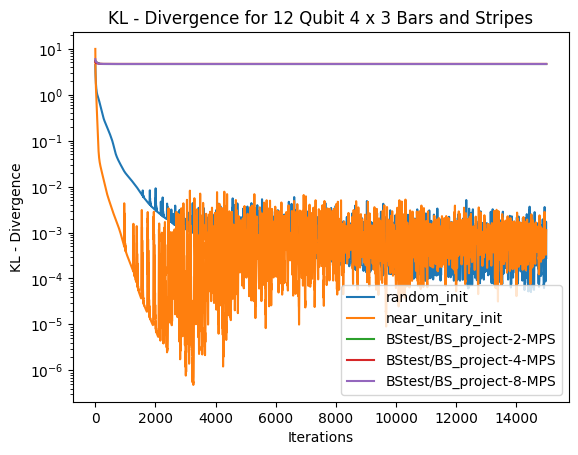

In [35]:
for key in weights_and_losses_for_chis:
    temp = []
    print(key)
    
    for loss in weights_and_losses_for_chis[key][1]:
        temp.append(float(loss))    
    print(temp)
    plt.yscale('log')
    plt.plot(temp, label=key)
plt.title('KL - Divergence for 12 Qubit 4 x 3 Bars and Stripes')
plt.xlabel('Iterations')
plt.ylabel('KL - Divergence')
plt.legend(loc="lower right")
plt.show()

In [32]:
weights_and_losses_for_chis['BStest/BS_project-8-MPS'][1]

[Array(5.89683814, dtype=float64),
 Array(5.78679855, dtype=float64),
 Array(5.67456117, dtype=float64),
 Array(5.55537863, dtype=float64),
 Array(5.44540838, dtype=float64),
 Array(5.36545637, dtype=float64),
 Array(5.32151169, dtype=float64),
 Array(5.3014125, dtype=float64),
 Array(5.29104053, dtype=float64),
 Array(5.28293769, dtype=float64),
 Array(5.27429263, dtype=float64),
 Array(5.26984344, dtype=float64),
 Array(5.27171799, dtype=float64),
 Array(5.26955905, dtype=float64),
 Array(5.25853691, dtype=float64),
 Array(5.24578847, dtype=float64),
 Array(5.23732087, dtype=float64),
 Array(5.23145596, dtype=float64),
 Array(5.22360426, dtype=float64),
 Array(5.21178233, dtype=float64),
 Array(5.19723105, dtype=float64),
 Array(5.18236189, dtype=float64),
 Array(5.16890455, dtype=float64),
 Array(5.15732776, dtype=float64),
 Array(5.14739488, dtype=float64),
 Array(5.13903426, dtype=float64),
 Array(5.13263504, dtype=float64),
 Array(5.12859622, dtype=float64),
 Array(5.12673804, dt

Array([], dtype=float64)

  0%|          | 0/2 [00:19<?, ?it/s]


TypeError: apply_updates() takes 2 positional arguments but 3 were given

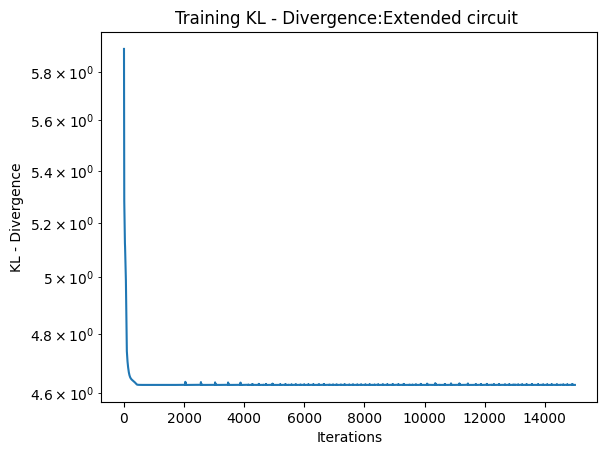

In [14]:
random_and_near_identity_circuit.plot_KL_divergence(loss_track_extended, "Extended circuit ")

In [5]:
x = np.array(pnp.random.normal(size=(2, 2), requires_grad=True))
x

array([[ 0.90399917,  1.57546791],
       [ 1.2066079 , -0.28286355]])

In [7]:
f =[
    [[1,2],[2,2]
      ]]

In [9]:
f = np.array(f)
np.concatenate((x,f),axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)